# Predicting Admission Using Decision Tree Classifier
This notebook demonstrates the process of building a machine learning model to predict whether a student will get admission based on GRE and academic scores.

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
# Load the dataset
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Data Preprocessing
Perform necessary preprocessing steps such as handling missing values and encoding categorical variables.

In [10]:
# Check for missing values
print(data.isnull().sum())
# No missing values in this dataset

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [11]:
# Select features and target variable
X = data[['GRE Score', 'CGPA']]
y = data['Chance of Admit ']

## Train-Test Split
Split the data into training and testing sets.

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Apply Decision Tree Classifier
Train a Decision Tree Classifier on the training data.

In [13]:
# Binarize the target variable
y_train_binarized = (y_train >= 0.5).astype(int)

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train_binarized)

DecisionTreeClassifier(random_state=42)

## Evaluate the Model
Evaluate the performance of the model using accuracy score.

In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Binarize y_test to match the binary format of y_pred
y_test_binarized = (y_test >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_binarized, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.25%


## Visualizations
Explore the data and model performance using visualizations.

In [15]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\AppData\Local\Temp\ipykernel_19692\4132577533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


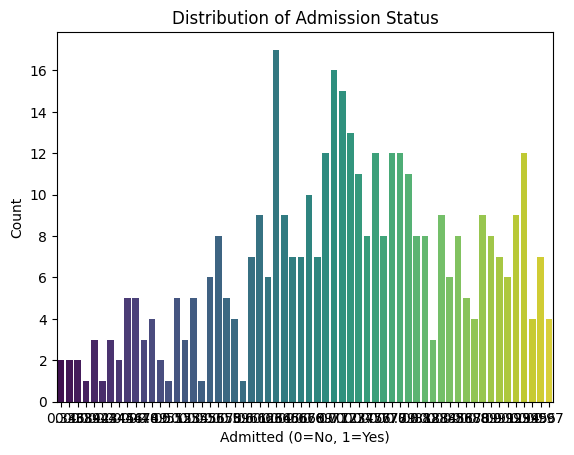

In [16]:
# Distribution of Admission Status
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of Admission Status')
plt.xlabel('Admitted (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

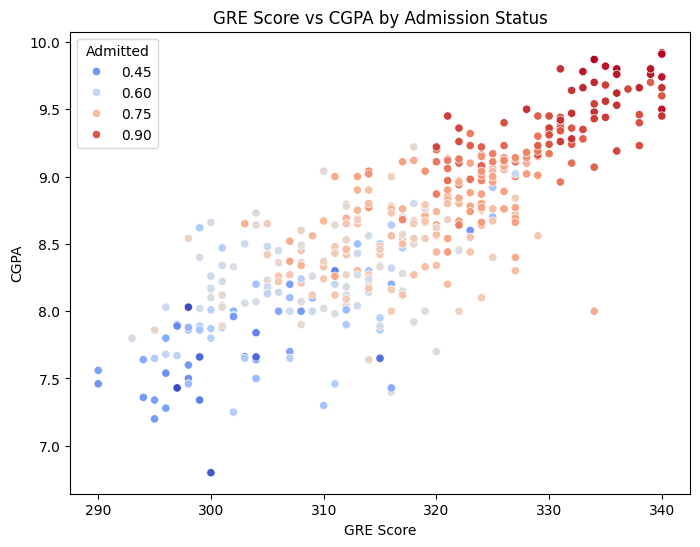

In [17]:
# Scatter Plot: GRE Score vs CGPA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GRE Score', y='CGPA', hue=y, data=data, palette='coolwarm')
plt.title('GRE Score vs CGPA by Admission Status')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.legend(title='Admitted')
plt.show()

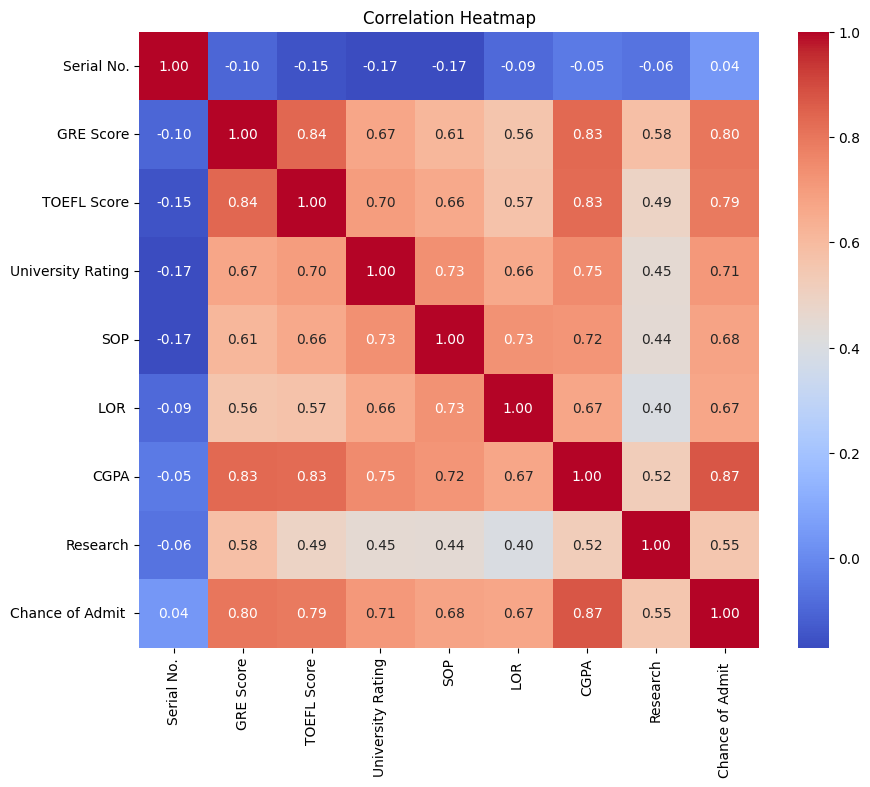

In [18]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

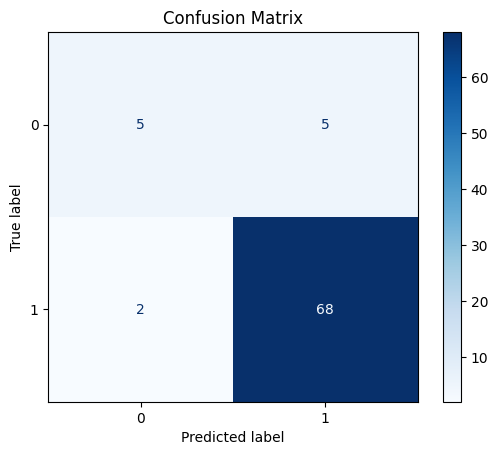

In [20]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Use the binarized version of y_test
cm = confusion_matrix(y_test_binarized, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()